In [1]:
import numpy as np
import matplotlib.pyplot as plt

# STATS 607
## Week 5.2: Numerical methods

![numerical methods](https://media.springernature.com/full/springer-static/cover-hires/book/978-1-4419-5945-4?as=webp)

These slides follow a nice set of lecture notes available here:
    
https://github.com/mandli/intro-numerical-methods

## Floating point arithmetic

- Computers must represent numbers using a limited amount of memory (bits).
- Given any number $f\in\mathbb{R}$, let $F$ be its representation in the computer.
-  Absolute Error:  
$$
    e = | f - F |
$$
- Relative Error:  
$$
    r = \frac{e}{|f|} = \frac{|f - F|}{|f|}
$$
- Example:
\begin{align}
f &= \sqrt{2} = 1.414213\dots \\
F &= 1.414 \\
e &= .000213\dots \\
r &\approx .00015
\end{align}

## Precision
- Given relative error $r$,  the precision $p$ is the largest integer such that
$$
    r \leq 5\times 10^{-p}
$$

- In the example above, $r=1.5 \times 10^{-4}$ so $F$ had $p=4$ significant digits.

### Floating Point Systems


A [floating point system](https://en.wikipedia.org/wiki/Floating-point_arithmetic) is a way to represent real numbers using a series of bits:


$$F = \pm d_1 . d_2 d_3 d_4 \ldots d_p \times \beta^e$$
 
- $\pm$ is a single bit representing the sign of the number;
- $d_1 . d_2 d_3 d_4 \ldots d_p$ is called the *mantissa*.  
    - The digits $d_2 d_3 d_4 \ldots d_p$ are called the *fraction* with $p$ digits of precision.  
    - Assume $d_1 \neq 0$ unless the $F \equiv 0$.
- $\beta$ is the *base*.  $\beta = 2$ is binary, $\beta=10$ is decimal, etc.
4. $e \in [e_\min, e_\max] \subset \mathbb{Z}$ is the *exponent*.

### Consequences

- The set of representable floating point numbers is finite.
- Representable numbers are non-uniformly distributed in $\mathbb{R}$.
- Arithmetic in floating point systems will (almost always) yield different results from "real"/infinite precision arithmetic.

### Machine epsilon

Machine epsilon (ε) is the smallest positive number that, when added to 1.0, results in a value distinguishable from 1.0 in a computer’s floating-point arithmetic

### Toy Floating Point System
Consider the toy 2-digit precision decimal system (normalized)
$$f = \pm d_1 . d_2 \times 10^E$$
with $E \in [-2, 0]$.


1. How many numbers can we represent with this system?

2. What is the distribution on the real line?

3. What is the underflow and overflow limits?


### How many numbers

- 2 signs $\times$ 9 choices for $d_1$ \times 10 choices for $d_2$ \times 3 exponents = 540

- Plus one for zero = 541

## Distribution on real line

In [44]:
import itertools as it
S = [-1, +1]
D1 = range(1, 10)
D2 = range(0, 10)
E = [-2, -1, 0]
numbers = [s * (d1 + d2 / 10) * (10 ** e) for s, d1, d2, e in it.product(S, D1, D2, E)]
numbers.append(0.)

In [47]:
def number_distribution(numbers):
    fig, ax = plt.subplots(figsize=(10.0, 1.0))
    for n in numbers:
        ax.plot(n, 0., "r+", markersize=20)
            
    ax.plot(0.0, 0.0, '+', markersize=20)
    ax.plot([-10.0, 10.0], [0.0, 0.0], 'k')

    ax.set_title("Distribution of Values")
    ax.set_yticks([])
    ax.set_xlabel("x")
    ax.set_ylabel("")
    ax.set_xlim([-1, 1])

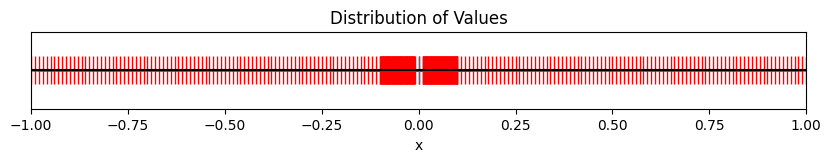

In [48]:
number_distribution(numbers)

#### Underflow and overflow

In [49]:
min(numbers), max(numbers)

(-9.9, 9.9)

### Binary systems

Now consider
$$
    f=\pm d_1 . d_2 \times 2^e \quad \text{with} \quad e \in [-1, 1]
$$

#### How many numbers

2 \times 1 \times 2 \times 3 = 13

(-5.0, 5.0)

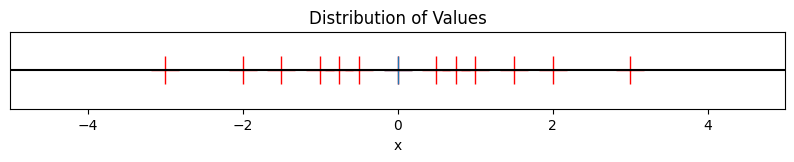

In [53]:
binary_numbers = [s * (d1 + d2 / 2) * (2 ** e) 
                  for s, d1, d2, e in it.product([-1, +1], [1], [0, 1], [-1, 0, 1])
                 ]
binary_numbers.append(0)
number_distribution(binary_numbers)
plt.xlim(-5, 5)

Smallest number that can be represented is the underflow:  $1.0 \times 2^{-1} = 0.5$

Largest number that can be represented is the overflow:  $1.1 \times 2^1 = 3$

- (Note that these numbers are in a binary system.)
    - There are 10 types of people in the world:
    - Those who understand binary, and those who do not.

### Real number systems: single precision

 - Exponent is 8 bits $\Rightarrow e \in [-126, 127]$
 - Fraction 23 bits ($p = 24$)
 
```
s EEEEEEEE FFFFFFFFFFFFFFFFFFFFFFF
0 1      8 9                     31
```
* Overflow $= 2^{127} \approx 3.4 \times 10^{38}$
* Underflow $= 2^{-126} \approx 1.2 \times 10^{-38}$
* $\epsilon_{\text{machine}} = 2^{-23} \approx 1.2 \times 10^{-7}$

### Double Precision
 - Exponent is 11 bits $\Rightarrow e \in [-1022, 1024]$
 - Fraction 52 bits ($p = 53$)
 
```
s EEEEEEEEEE FFFFFFFFFF FFFFFFFFFF FFFFFFFFFF FFFFFFFFFF FFFFFFFFFF FF
0 1       11 12                                                      63
```
* Overflow $= 2^{1024} \approx 1.8 \times 10^{308}$
* Underflow $= 2^{-1022} \approx 2.2 \times 10^{-308}$
* $\epsilon_{\text{machine}} = 2^{-52} \approx 2.2 \times 10^{-16}$

### Why care?
- Floating point arithmetic is not necessarily associative
- Floating point errors compound throughout the calculation.
- You can easily get unexpected results.

### Non-associativity

In [119]:
delta = np.finfo(float).eps / 2
delta

np.float64(1.1102230246251565e-16)

In [117]:
(1 + delta) - 1

np.float64(0.0)

In [121]:
1 + (delta - 1)

np.float64(1.1102230246251565e-16)

### Catastrophic cancellation

- Each floating point operation introduces error:
$$
    \text{fl}(x ~\text{op}~ y) = (x ~\text{op}~ y) (1 + \delta)
$$

    where $\text{fl}(\cdot)$ is a function that returns the floating point representation of the expression enclosed, $\text{op}$ is some operation (e.g. $+, -, \times, /$), and $\delta$ is the floating point error due to $\text{op}$.
- Suppose we add two numbers. The floating point error due to addition is

$$
    \text{fl}(x + y) = (x + y) (1 + \delta).
$$

- The relative error is thus 

$$\begin{aligned}
    \frac{(x + y) - \text{fl}(x + y)}{x + y} &= \frac{(x + y) - (x + y) (1 + \delta)}{x + y} = \delta.
\end{aligned}$$


- When we represent $x$ and $y$ as floating point numbers there is also error, say $$x+y=x(1+\delta_x) + y(1+\delta_y)$$

$$\begin{aligned}
    \frac{(x + y) - \text{fl}(x + y)}{x + y} &= \frac{(x + y) - (x + y) (1 + \delta)}{x + y} = \delta.
\end{aligned}$$

- So  $$\begin{aligned}
    \text{fl}(x + y) &= x (1 + \delta_x) + y (1 + \delta_y) \\
    &= x + y + x \delta_x + y \delta_y \\
    &= (x + y) \left(1 + \frac{x \delta_x + y \delta_y}{x + y}\right)
\end{aligned}$$

- And in terms of relative error,

$$\begin{aligned}
    \frac{x + y - (x + y) \left(1 + \frac{x \delta_x + y \delta_y}{x + y}\right)}{x + y} &= 1 - \left(1 + \frac{x \delta_x + y \delta_y}{x + y}\right) \\
    &= \frac{x}{x + y} \delta_x + \frac{y}{x + y} \delta_y \\
    &= \frac{1}{x + y} (x \delta_x + y \delta_y)
\end{aligned}$$

- $\therefore$ the error is dependent on the values of $x$ and $y$ and more importantly, their sum.  
- What happens when $x + y \ll 1$?

In [131]:
dx = 10. ** np.arange(-15, -1)
x = 1.0 + dx
y = -1.0
error = abs(x + y - dx) / (dx)

Text(0.5, 1.0, 'Difference between $x$ and $y$ vs. Relative Error')

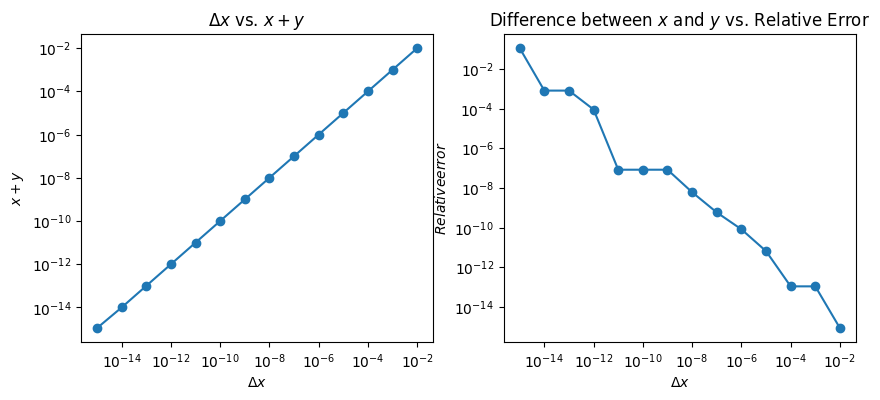

In [135]:
fig, ax = plt.subplots(ncols=2, figsize=(10, 4))
ax[0].loglog(dx, x + y, 'o-')
ax[0].set_xlabel("$\Delta x$")
ax[0].set_ylabel("$x + y$")
ax[0].set_title("$\Delta x$ vs. $x+y$")

ax[1].loglog(dx, error, 'o-')
ax[1].set_xlabel("$\Delta x$")
ax[1].set_ylabel("$Relative error$")
ax[1].set_title("Difference between $x$ and $y$ vs. Relative Error")


### Unexpected function evaluation

- Consider the function
$$
    f(x) = \frac{1 - \cos x}{x^2}
$$
with $x\in[-10^{-4}, 10^{-4}]$.  

- As $x \rightarrow 0$,
$$
    \lim_{x \rightarrow 0} \frac{1 - \cos x}{x^2} = \lim_{x \rightarrow 0} \frac{\sin x}{2 x} = \lim_{x \rightarrow 0} \frac{\cos x}{2} = \frac{1}{2}.
$$

- What does floating point representation do?

Text(0, 0.5, 'Relative Error')

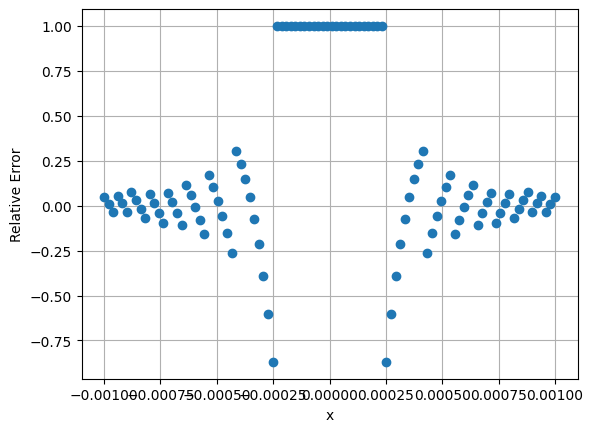

In [143]:
x = np.linspace(-1e-3, 1e-3, 100, dtype=np.float32)
error = (0.5 - (1.0 - np.cos(x)) / x**2) / 0.5


plt.plot(x, error, 'o')
plt.xlabel("x")
plt.grid()
plt.ylabel("Relative Error")

### Evaluating a polynomial

Consider evaluating the polynomial:

$$f(x) = x^7 - 7x^6 + 21 x^5 - 35 x^4 + 35x^3-21x^2 + 7x - 1$$
   

Text(0.5, 1.0, 'error')

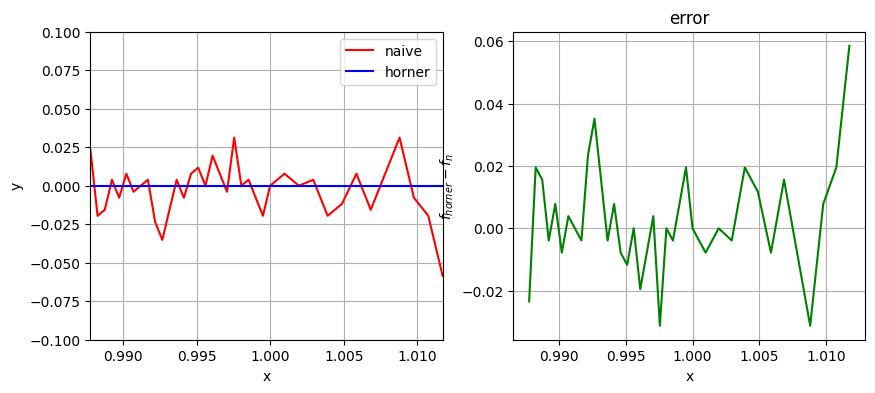

In [166]:
p = [1, -7, 21, -35, 35, -21, 7, -1]

def naive(x):
    return sum(c * x ** i for i, c in enumerate(p[::-1]))

x = np.linspace(0.988, 1.012, dtype=np.float16)
y = x**7 - 7.0 * x**6 + 21.0 * x**5 - 35.0 * x**4 + 35.0 * x**3 - 21.0 * x**2 + 7.0 * x - 1.0

yh = np.polyval(p, x)
fig, axs = plt.subplots(ncols=2, figsize=(10,4))

axs[0].plot(x, y, 'r',label='naive')
axs[0].plot(x, yh, 'b',label='horner')
axs[0].set_xlabel("x")
axs[0].set_ylabel("y")
axs[0].set_ylim((-0.1, 0.1))
axs[0].set_xlim((x[0], x[-1]))
axs[0].grid()
axs[0].legend()

axs[1].plot(x,yh-y,'g')
axs[1].grid()
axs[1].set_xlabel('x')
axs[1].set_ylabel('$f_{horner} - f_n$')
axs[1].set_title('error')

## Initial value problems 

- A surprising number of physical/biological/ecological/probabilistic systems can be written as a system of ordinary differential equations (ODEs).  

- Very fundamental example from stochastic processes: Kolmogorov equations:

$$ \frac{d P_{ij}}{dt} = \sum_k P_{ik}(t) q_{kj} $$ 

where $q_{kj}$ is the rate of transitioning from state $k$ to state $j$.

- When the initial state is known (usually the case), we have the problems can be written as

$$
    \frac{\text{d} \vec{\!u}}{\text{d}t} = \vec{\!f}(t, \vec{\!u}) \quad \vec{\!u}(0) = \vec{\!u}_0
$$

where
 - $\vec{\!u}(t)$ is the state vector
 - $\vec{\!f}(t, \vec{\!u})$ is a vector-valued function that controls the growth of $\vec{u}$ with time
 - $\vec{\!u}(0)$ is the initial condition at time $t = 0$

#### Examples  Simple radioactive decay
$$
    \vec{\!u} = [c]
$$
   
$$
    \frac{\text{d} c}{\text{d}t} = \lambda c \quad c(0) = c_0
$$
   

which has solutions of the form $c(t) = c_0 e^{\lambda t}$

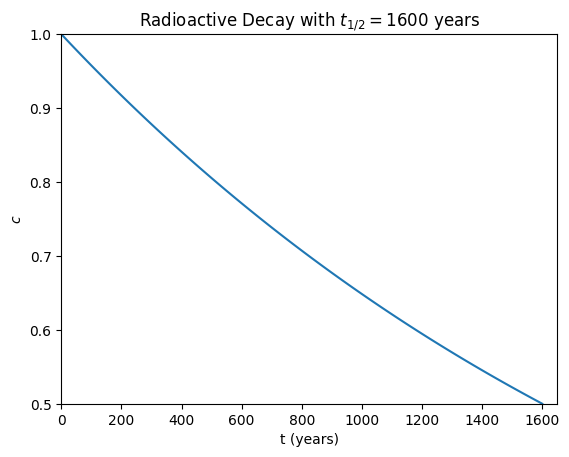

In [168]:
t = np.linspace(0.0, 1.6e3, 100)
c_0 = 1.0
decay_constant = -np.log(2.0) / 1600.0

plt.plot(t, 1.0 * np.exp(decay_constant * t))

plt.title("Radioactive Decay with $t_{1/2} = 1600$ years")
plt.xlabel('t (years)')
plt.ylabel('$c$')
plt.xlim((0.0, 1650))
plt.ylim((0.5,1.0))
plt.show()

#### Example:  Particle tracking in a fluid

$$\frac{\text{d} \vec{\!X}}{\text{d}t} = \vec{\!V}(t, \vec{\!X})$$


### Solving an IVP

- How do we compute the position of the particle at time $t$? 
- The simplest/most naive approach is to take a small time step forward, and approximate $X(t + dt) \approx X(t) + X'(t)dt$.
- This is (basically) https://en.wikipedia.org/wiki/Euler_method.

A famous example is the Van der Pol oscillator:
\begin{align}
y'' - \mu (1 - y^2) y' + y &= 0, \quad \quad \text{with} \quad \quad y(0) = y_0, \quad y'(0) = v_0, \\
\vec{\!u} &= \begin{bmatrix} y \\ y' \end{bmatrix} = \begin{bmatrix} u_1 \\ u_2 \end{bmatrix}, \\
\frac{\mathrm{d}}{\mathrm{d}t} \begin{bmatrix} u_1 \\ u_2 \end{bmatrix} &= \begin{bmatrix} u_2 \\ \mu (1 - u_1^2) u_2 - u_1 \end{bmatrix} = \vec{\!f}(t, \vec{\!u}).
\end{align}


In [268]:
def f(t, u, mu=5):
    return np.array([u[1], mu * (1.0 - u[0]**2) * u[1] - u[0]])

N = 500 # steps
t = np.linspace(0.0, 100, N)
u = np.empty((N, 2))
u[0] = [0.1, 0.0]
for i in range(1, N):
    u[i] = u[i - 1] + f(t[i - 1], u[i - 1]) * (t[i] - t[i - 1])
    
plt.plot(t, u[:, 0])
plt.plot(t, u[:, 1])

/tmp/ipykernel_586914/1866536668.py:2: RuntimeWarning: overflow encountered in scalar multiply
  return np.array([u[1], mu * (1.0 - u[0]**2) * u[1] - u[0]])
/tmp/ipykernel_586914/1866536668.py:2: RuntimeWarning: overflow encountered in scalar power
  return np.array([u[1], mu * (1.0 - u[0]**2) * u[1] - u[0]])
/tmp/ipykernel_586914/1866536668.py:9: RuntimeWarning: invalid value encountered in add
  u[i] = u[i - 1] + f(t[i - 1], u[i - 1]) * (t[i] - t[i - 1])


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

# Example data (replace with your actual data)
# u = np.array([[np.sin(0.1 * np.arange(1000))], [np.cos(0.1 * np.arange(1000))]])  # Replace this
# t = np.linspace(0, 10, u.shape[1])  # Replace with your time array

def animate_solution(t: np.ndarray, u: np.ndarray):
    u = u.T
    fig, ax = plt.subplots()
    ax.set_xlim(u[0].min() - 0.1, u[0].max() + 0.1)
    ax.set_ylim(u[1].min() - 0.1, u[1].max() + 0.1)
    ax.s et_xlabel(r"$u_1(t)$")
    ax.set_ylabel(r"$u_2(t)$")
    ax.set_title("Phase Space Trajectory")

    # Line for the trajectory
    line, = ax.plot([], [], lw=2, label="Trajectory")
    point, = ax.plot([], [], 'ro', label="Current Point")
    ax.legend()

    def init():
        line.set_data([], [])
        point.set_data([], [])
        return line, point

    def update(frame):
        line.set_data(u[0, max(0, frame-10):frame], u[1, max(0, frame-10):frame])
        point.set_data(u[0, frame], u[1, frame])
        return line, point

    return FuncAnimation(fig, update, frames=len(t), init_func=init, blit=True, interval=20)

### Backward Euler method

Tthe *backward Euler* method evaluates the function $f$ at the updated time so that
$$
    U_{n+1} = U_n + \Delta t f(t_{n+1}, U_{n+1}).
$$
- This is an implicit method: $U_{n+1}$ occurs on both sides of the equation.
- Ability to do this depends on being able to solve this equation for U_{n+1}.
- For example if $f(t, U) = A_t U$ (linear ODE), then $$U_{n+1} = (I - \Delta t A)^{-1} U_n$$

### Stiffness

- Why use implicit Euler? It's better for stiff systems.
- Per [Wikipedia](https://en.wikipedia.org/wiki/Stiff_equation):
> In mathematics, a stiff equation is a differential equation for which certain numerical methods for solving the equation are numerically unstable, unless the step size is taken to be extremely small. It has proven difficult to formulate a precise definition of stiffness, but the main idea is that the equation includes some terms that can lead to rapid variation in the solution.

In [257]:
from scipy.optimize import root

# Define the function f(t, u)
def f(t, u, mu=5):
    return np.array([u[1], mu * (1.0 - u[0]**2) * u[1] - u[0]])

# Define the backward Euler method
def backward_euler_step(t_prev, u_prev, dt, mu=5):
    # Define the implicit system to solve: u_next - u_prev - dt * f(t_next, u_next) = 0
    def implicit_equation(u_next):
        return u_next - u_prev - dt * f(t_prev + dt, u_next, mu)

    # Use a root-finder to solve for u_next
    result = root(implicit_equation, u_prev)  # Initial guess is u_prev
    return result.x  # Return the solution

In [263]:
# Initialize solution array
# Time steps
N = 5000  # Number of steps
t = np.linspace(0.0, 100, N)
dt = t[1] - t[0]
u = np.empty((N, 2))
u[0] = [0.1, 0.0]  # Initial condition

# Perform the backward Euler integration
for i in range(1, N):
    u[i] = backward_euler_step(t[i - 1], u[i - 1], dt)

In [208]:
# implement backward method

## Error analysis
Define the *truncation error* of a scheme by replacing the $U_n$ with the true solution $u(t_n)$ in the finite difference formula and looking at the difference from the exact solution.

For example for forward Euler
$$
    \frac{U_{n+1} - U_n}{\Delta t} = f(t_n)
$$
and the truncation error is
$$
    T(t, u; \Delta t) = \frac{u(t_{n+1}) - u(t_n)}{\Delta t} - f(t_n, u(t_n)).
$$

### Consistency
A method is called *consistent* if 
$$
    \lim_{\Delta t \rightarrow 0} T(t, u; \Delta t) = 0.
$$

### Order accuracy

We say that a method is *order* $p$ accurate if

$$
    \lVert T(t, u; \Delta t) \rVert \leq C \Delta t^p
$$

uniformally on $t \in [0, T]$.  This can also be written as $T(t, u; \Delta t) = \mathcal{O}(\Delta t^p)$.  Note that a method is consistent if $p > 0$.

### Error Analysis of Forward Euler

We can analyze the error and convergence order of forward Euler by considering the Taylor series centered at $t_n$:
$$
    u(t) = u(t_n) + (t - t_n) u'(t_n) + \frac{u''(t_n)}{2} (t - t_n)^2 + \mathcal{O}((t-t_n)^3)
$$

Evaluating this series at $t_{n+1}$ gives
$$\begin{aligned}
    u(t_{n+1}) &= u(t_n) + (t_{n+1} - t_n) u'(t_n) + \frac{u''(t_n)}{2} (t_{n+1} - t_n)^2 + \mathcal{O}((t_{n+1}-t_n)^3)\\
    &=u_n + \Delta t f(t_n, u_n) + \frac{u''(t_n)}{2} \Delta t^2 + \mathcal{O}(\Delta t^3)
\end{aligned}$$

From the definition of truncation error we can use our Taylor series expression and find the truncation error.  Take the finite difference form of forward Euler
$$
    \frac{U_{n+1} - U_n}{\Delta t} = f(t_n)
$$
and replacing the derivative formulation with $u(t_n)$ to find
$$\begin{aligned}
    T(t, u; \Delta t) &= \frac{u(t_{n+1}) - u(t_n)}{\Delta t} - f(t_n) \\
    &= \frac{u(t_{n+1}) - u(t_n)}{\Delta t} - u'(t_n).
\end{aligned}$$

From here we use the Taylor series centered at $t_n$ and evaluated at $t_{n+1}$ to find
$$\begin{aligned}
    T(t, u; \Delta t) &= \frac{u(t_{n+1}) - u(t_n)}{\Delta t} - u'(t_n) \\
    &= \frac{1}{\Delta t} \left[ u(t_n) + u'(t_n) (t - t_n) + \frac{u''(t_n)}{2} (t - t_n)^2 + \mathcal{O}((t-t_n)^3) - u(t_n) \right] - u'(t_n) \\
    &=  u'(t_n) + \frac{u''(t_n)}{2} \Delta t + \mathcal{O}(\Delta t^2) - u'(t_n) \\
    &= \frac{u''(t_n)}{2} \Delta t + \mathcal{O}(\Delta t^2).
\end{aligned}$$

This implies that forward Euler is first order accurate and therefore consistent.

## Numerical linear algebra (iterative/matrix-free methods)

Considering the following *smoothing problem*:

Given noisy observations $ (x_i, y_i) $, $ i = 1, 2, \ldots, n $, find a function $ u(x) $ minimizes the penalized least squares functional:
$$
\sum_{i=1}^n \left(y_i - u(x_i)\right)^2 + \lambda \int_a^b \left(u''(x)\right)^2 \, dx,
$$


- To find $ u(x) $, we solve the minimization problem by considering the corresponding Euler-Lagrange equation. 
- The necessary condition for $ u(x) $ to minimize the functional is:
$$
-\frac{d^2}{dx^2} u(x) = f(x), \quad x \in [a, b],
$$
where:
$$
f(x) = -\sum_{i=1}^n \delta(x - x_i) (y_i - u(x_i)),
$$
and $ \delta(x - x_i) $ is the Dirac delta function, representing point evaluations of the residuals.

- Boundary conditions: $u(a)=\alpha, u(b)=\beta$

How might you discretize the above ODE?

Following our finite difference discussion we can setup the following set of algebraic equations:
 
$$
    \frac{U_{i-1} - 2 U_i + U_{i+1}}{\Delta x^2} = f(x_i).
$$


This leads to the following matrix equation:

$$
    \frac{1}{\Delta x^2} \begin{bmatrix}
    -2 &  1 &    &    &    \\
     1 & -2 &  1 &    &    \\
       &  1 & -2 &  1 &    \\
       &    &  1 & -2 &  1 \\
       &    &    &  1 & -2 \\
    \end{bmatrix} \begin{bmatrix}
        U_1 \\ U_2 \\ U_3 \\ U_4 \\ U_5
    \end{bmatrix} = 
    \begin{bmatrix}
        f(x_1) - \frac{\alpha}{\Delta x^2} \\ f(x_2) \\ f(x_3) \\ f(x_4) \\ f(x_5) - \frac{\beta}{\Delta x^2} \\
    \end{bmatrix}.
$$

#### Computational Load

Now consider using Gaussian elimination on the above matrix.  For good measure let us consider a 3D problem and discretize each dimension with a $m = 100$ leading to $100 \times 100 \times 100 = 10^6$ unknowns.

Gaussian Elimination - $\mathcal{O}(N^3)$ operations to solve, $(10^6)^3 = 10^{18}$ operations.

Suppose you have a machine that can perform 100 gigaflops (floating point operations per second):
$$
    \frac{10^{18}~ [\text{flop}]}{10^{11}~ [\text{flop / s}]} = 10^7~\text{s} \approx 115~\text{days}.
$$

#### Memory Load

What about memory?

We require $N^2$ to store entire array.  In double precision floating point we would require 8-bytes per entry leading to
$$
    (10^6)^2 ~[\text{entries}] \times 8 ~[\text{bytes / entry}] = 8 \times 10^{12} ~[\text{bytes}] = 8 ~[\text{terabytes}].
$$

## Jacobi and Gauss-Seidel

The Jacobi and Gauss-Seidel methods are simple approaches to introducing an iterative means for solving the problem $Ax = b$ when $A$ is sparse.  Consider the general equation derived from the Poisson problem
$$
    \frac{U_{i-1} - 2 U_i + U_{i+1}}{\Delta x^2} = f(x_i).
$$

If we rearrange this expression to solve for $U_i$ we have
$$
    U_i = \frac{1}{2} (U_{i+1} + U_{i-1}) - f(x_i) \frac{\Delta x^2}{2}.
$$

For a direct method we would simultaneously find the values of $U_i$, $U_{i+1}$ and $U_{i-1}$ but instead consider the iterative scheme computes an update to the equation above by using the past iterate (values we already know)
$$
    U_i^{(k+1)} = \frac{1}{2} (U_{i+1}^{(k)} + U_{i-1}^{(k)}) - f(x_i) \frac{\Delta x^2}{2}.
$$

Since this allows us to evaluate $U_i^{(k + 1)}$ without knowing the values of $U_{i+1}^{(k)} + U_{i-1}^{(k)}$ we directly evaluate this expression!  This process is called **Jacobi iteration**.  It can be shown that for this particular problem Jacobi iteration will converge from any initial guess $U^{(0)}$ although slowly.

This is an example of a **matrix-free method**: we never actually store or create the matrix $A$.

### Example
Let's use Jacobi iterations to solve
$$
    u_{xx} = e^x, \quad x \in [0, 1] \quad \text{with} \quad u(0) = 0, \text{ and } u(1) = 3
$$

In [273]:
# Problem setup
a = 0.0
b = 1.0
u_a = 0.0
u_b = 3.0
f = np.exp
u_true = lambda x: (4.0 - np.exp(1.0)) * x - 1.0 + np.exp(x)

# Descretization
N = 100
x_bc = np.linspace(a, b, N + 2)
x = x_bc[1:-1]
delta_x = (b - a) / (N + 1)

# Expected iterations needed
iterations_J = int(2.0 * np.log(delta_x) / np.log(1.0 - 0.5 * np.pi**2 * delta_x**2))

# Solve system
# Initial guess for iterations
U_new = np.zeros(N + 2)
U_new[0] = u_a
U_new[-1] = u_b
convergence_J = np.zeros(iterations_J)
for k in range(iterations_J):
    U = U_new.copy()
    for i in range(1, N + 1):
        U_new[i] = 0.5 * (U[i+1] + U[i-1]) - f(x_bc[i]) * delta_x**2 / 2.0

    convergence_J[k] = np.linalg.norm(u_true(x_bc) - U_new, ord=2)
    

<IPython.core.display.Javascript object>


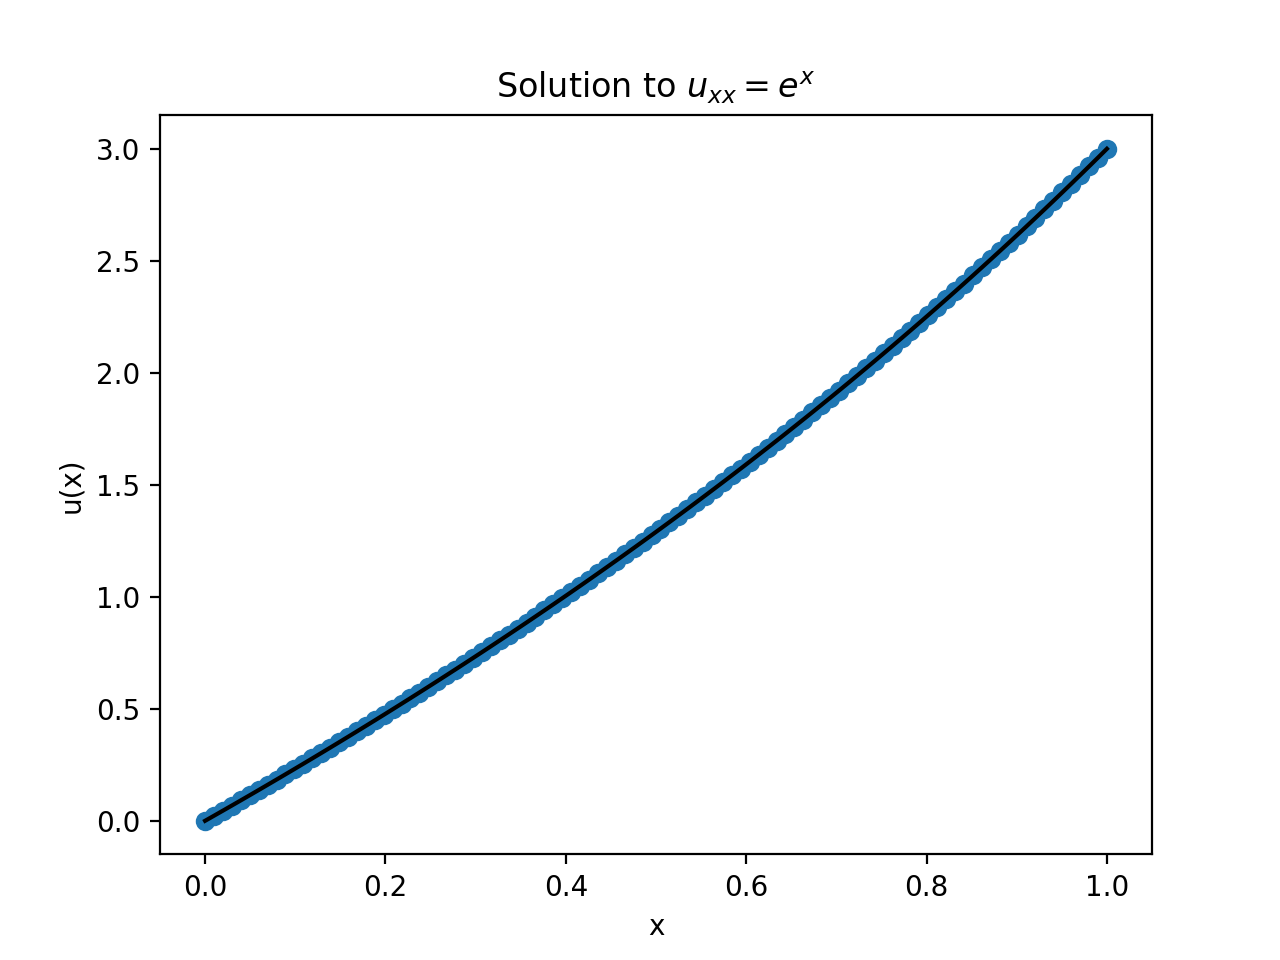

<IPython.core.display.Javascript object>


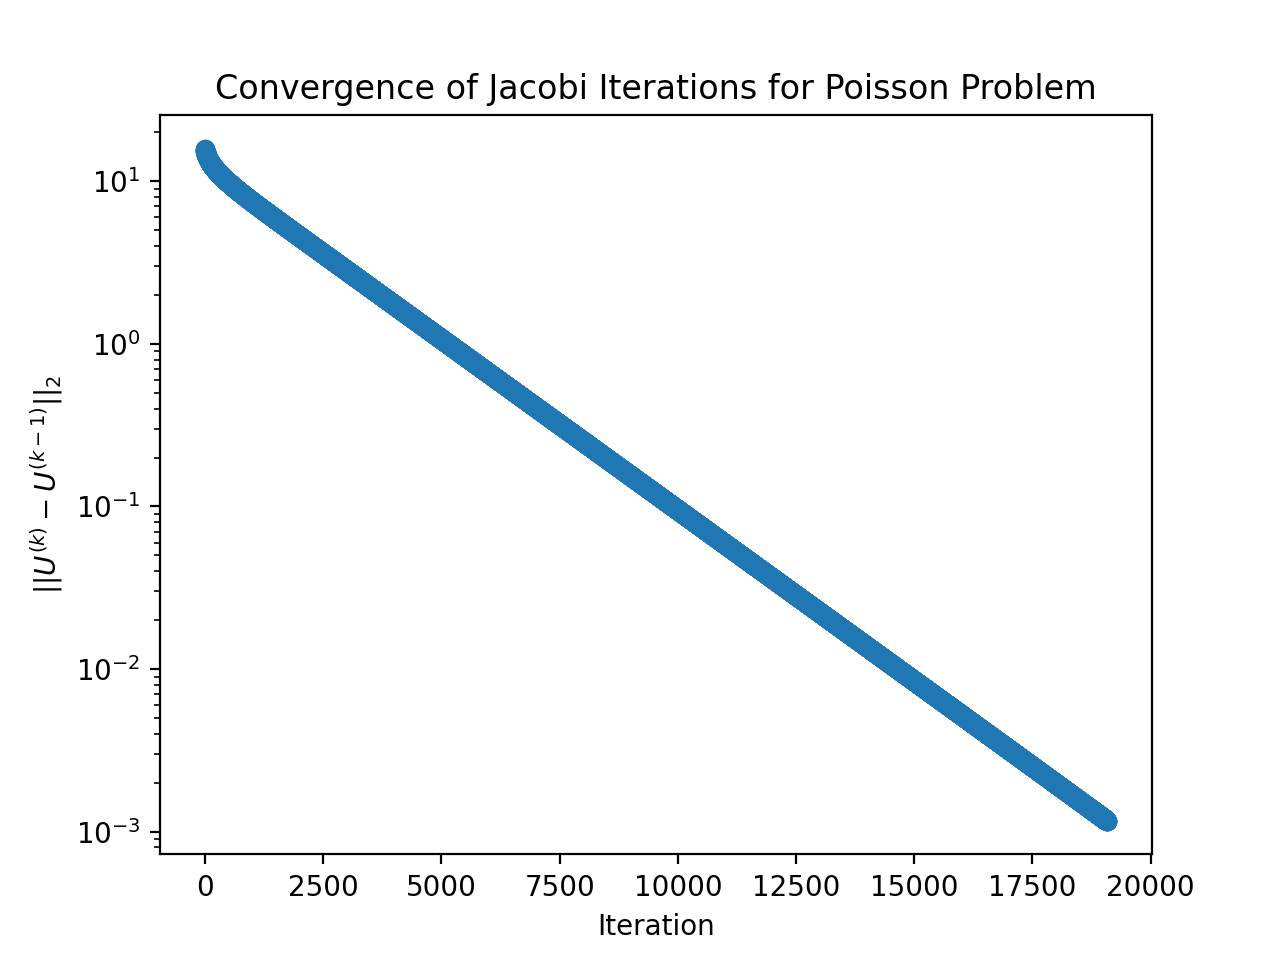

In [274]:
# Plot result
fig = plt.figure()
axes = fig.add_subplot(1, 1, 1)
axes.plot(x_bc, U, 'o', label="Computed")
axes.plot(x_bc, u_true(x_bc), 'k', label="True")
axes.set_title("Solution to $u_{xx} = e^x$")
axes.set_xlabel("x")
axes.set_ylabel("u(x)")

fig = plt.figure()
axes = fig.add_subplot(1, 1, 1)
axes.semilogy(range(iterations_J), convergence_J, 'o')
axes.set_title("Convergence of Jacobi Iterations for Poisson Problem")
axes.set_xlabel("Iteration")
axes.set_ylabel("$||U^{(k)} - U^{(k-1)}||_2$")

plt.show()

import struct

def print_float32_bits(value: float) -> None:
    """Prints the raw bit representation of a 32-bit floating-point number."""
    # Pack the float into 4 bytes, then unpack as an unsigned integer
    packed = struct.pack('>f', value)  # Big-endian float
    bits = struct.unpack('>I', packed)[0]  # Interpret as unsigned int
    
    # Extract sign, exponent, and fraction
    sign = (bits >> 31) & 0x1
    exponent = (bits >> 23) & 0xFF
    fraction = bits & 0x7FFFFF
    
    # Format the bits as byte string
    bit_str = f"{sign} {exponent:08b} {fraction:023b}"
    print("s EEEEEEEE FFFFFFFFFFFFFFFFFFFFFFF")
    print(bit_str)
                   

In [108]:
f = np.finfo(np.float32).eps
print_float32_bits(f/2)

s EEEEEEEE FFFFFFFFFFFFFFFFFFFFFFF
0 01100111 00000000000000000000000
